# Lecture 08 and 09: Practical analyses in Python

## Dictionaries
Python defines a powerful type called a dictionary or `dict`.

### Mutable versus immutable types
Before using dictionaries, we need to understand the difference between [mutable and immutable types](https://medium.com/@meghamohan/mutable-and-immutable-side-of-python-c2145cf72747).

Let's review the types we've learned so far:
#### Integers

In [1]:
x_int = 1

type(x_int)

int

An integer is immutable, we can't change it's value by reassigment:

In [2]:
y_int = x_int
y_int += 1
print(f"y_int = {y_int}, x = {x_int}")

y_int = 2, x = 1


#### Floats

In [3]:
x_float = 3.7

type(x_float)

float

Floats are also immutable:

In [4]:
y_float = x_float
y_float += 1
print(f"y_float = {y_float}, x = {x_float}")

y_float = 4.7, x = 3.7


#### Lists

In [5]:
x_list = [1, 2, 3]

type(x_list)

list

But lists are mutable:

In [6]:
y_list = x_list
y_list.append(4)

print(f"y_list = {y_list}, x_list = {x_list}")

y_list = [1, 2, 3, 4], x_list = [1, 2, 3, 4]


Notice how the value of `x_list` has changed too! Lists are mutable, meaning they point to the mutable object, not to its value.
Be careful with mutable objects!

There is an immutable object that has some similar properties to a list called a `tuple`, but we aren't going to go into those right now.

#### Strings

In [7]:
x_str = 'hello'

type(x_str)

str

Strings are immutable:

In [8]:
y_str = x_str
y_str += ' friend'

print(f"y_str = {y_str}, x_str = {x_str}")

y_str = hello friend, x_str = hello


### What is a dictionary?
Dictionaries are "look up tables" that can be used to map keys to values:

In [9]:
teacher_dict = {'best_teacher': 'Jesse',
                'worst_teacher': 'Rasi'}

teacher_dict

{'best_teacher': 'Jesse', 'worst_teacher': 'Rasi'}

This dictionary maps the best and worst teachers to their names.
We can look up the value for a key:

In [10]:
teacher_dict['best_teacher']

'Jesse'

Note that we get an error if they key doesn't exist:

In [11]:
teacher_dict['second_best_teacher']

KeyError: 'second_best_teacher'

We can get all of the keys:

In [12]:
teacher_dict.keys()

dict_keys(['best_teacher', 'worst_teacher'])

Or the values:

In [13]:
teacher_dict.values()

dict_values(['Jesse', 'Rasi'])

Or the items, which are tuples with keys and values:

In [14]:
teacher_dict.items()

dict_items([('best_teacher', 'Jesse'), ('worst_teacher', 'Rasi')])

We can add entries to a dictionary like this:

In [15]:
teacher_dict['most_fashionable_teacher'] = 'Trevor'

teacher_dict

{'best_teacher': 'Jesse',
 'worst_teacher': 'Rasi',
 'most_fashionable_teacher': 'Trevor'}

Note that the above cell shows that dictionaries are mutable, as we changed the dictionary by adding to it.

An advantage of a dictionary is that it is very fast to look up key / value pairs even if there are lots of entries in the dictionary.

So why did I make a big deal about mutable versus immutable?
Dictionary keys can **only** be immutable. 
So keying a dictionary with a mutable type (such as a `list`) is not allowed:

In [16]:
teacher_dict[['previous_teacher', 'current_teacher']] = [['Erick', 'Jesse']]

TypeError: unhashable type: 'list'

But dictionary values can be mutable:

In [17]:
teacher_dict['previous_and_current_teachers'] = [['Erick', 'Jesse']]

teacher_dict

{'best_teacher': 'Jesse',
 'worst_teacher': 'Rasi',
 'most_fashionable_teacher': 'Trevor',
 'previous_and_current_teachers': [['Erick', 'Jesse']]}

## Using a dictionary in a function
Now we will use a dictionary to implement a function that gets the reverse complement of a sequence.

Here is the desired signature of the function. Can you write this function?

In [18]:
def reverse_complement(seq):
    """Get reverse complement of a DNA sequence.
    
    Parameters
    -----------
    seq : str
        Uppercase DNA sequence.
        
    Returns
    -------
    str
        Reverse complement of the sequence in upper case.
        
    Example
    --------
    >>> reverse_complement('ATGCAC')
    'GTGCAT'
    
    """
    rc_dict = {'A': 'T', 'T': 'A', 'G': 'C', 'C': 'G', 'N': 'N'}
    revcomplement = []
    for nt in reversed(seq.upper()):
        revcomplement.append(rc_dict[nt])
    return ''.join(revcomplement)

Once the function is written, you can use it:

In [19]:
reverse_complement('ATGCAC')

'GTGCAT'

In [20]:
reverse_complement('aTGCTAAAAGTTCAGGATACAGGTAAN')

'NTTACCTGTATCCTGAACTTTTAGCAT'

## Regular expressions
The `re` module is for "regular expressions". 
These are very useful for parsing strings.

Here is a common example from my work with influenza.
You download some strains from the database, and they have names that look like this:

In [21]:
strain1 = 'A/New York/3/1994 (H3N2)'
strain2 = 'A/California/3/X/2003 (H12N1)'
strain3 = 'A/Perth/2009 (H3N2)'

strains = [strain1, strain2, strain3]

You want to get some information out of these, like the year.

Regular expressions allow you to define patterns in a string.
Here we build a regular expression that gets the subtype out and then use a dictionary to count how many sequences there are of each subtype:

In [22]:
import re

# regular expression that gets year and subtype
strainmatch = re.compile(
        '(?P<year>\d{4}) \((?P<subtype>H\d+N\d+)\)$')

subtype_counter = {}  # dict to store the results

for strain in strains:  # loop over all strains
    m = strainmatch.search(strain)
    year = m.group('year')
    subtype = m.group('subtype')
    if subtype in subtype_counter:
        subtype_counter[subtype] += 1
    else:
        subtype_counter[subtype] = 1
        
print(subtype_counter)

{'H3N2': 2, 'H12N1': 1}


There are lots of handy special codes in the Python regular expression module (see [here](https://docs.python.org/3.7/library/re.html)), and you can use them to do almost any type of string matching.

## Using regular expressions to parse barcodes
Now we will use regular expressions to parse barcodes from nucleotide sequences.
For instance, you might have to do this in a single-cell RNA-seq experiment where there is a barcode at the end of each read telling you the cell that the read came from.

Imagine that our valid molecules should have sequences like this:

`CTAGCNNNNNNGATCA`

See how there is a 6-nucleotide barcode in the center of the sequence.
We have a list of sequences, and want to parse through them to figure out which ones meet the expected pattern--and get the barcode from those that do:

In [23]:
seqs = ['CTAGCatcgatGATCA',  # has barcode ATCGAT
        'CCAGCatagcaGATCA',  # does not have expected 5' sequence
        'CTAGCtacagGATCA',   # barcode too short
        'CTAGCgaccatGATCA',  # has barcode GACCAT
        'CTAGCatcgatGATCA',  # has barcode ATCGAT
        'CTAGCatcgatGGTCA',  # does not have expected 3' sequence
        ]

Write a function that parses these barcoded sequences and gets the ones with valid barcodes.
In doing this, note that:

  1. If you have a string `s`, `s.upper()` makes it all uppercase.
  2. Consider using the following regular expression options (all described [here](https://docs.python.org/3.7/library/re.html):
    - `[]` indicates a set of characters.
    - `{n}` indicates number of occurrences.
    - `(?P<name>)` indicates a group with name `name`.
    - The `match` method finds a match at the beginning of the string.
    
Below I've written the function documentation, try to implement it:

In [24]:
def count_barcodes(seqs, bclen=6, upstream='CTAGC', downstream='GATCA'):
    """Parse and count barcodes.
    
    Parameters
    ----------
    seqs : list
        DNA sequences.
    bclen : int
        Length of barcode
    upstream : str
        Sequence upstream of barcode.
    downstream : str
        Sequence downstream of barcode.
        
    Returns
    -------
    dict
        Keyed by each valid barcode, value is number of times the barcode
        is observed.
        
    Note
    ----
    The function is **not** case-sensitive, and all barcodes are reported
    in upper-case.
    
    """
    regex = re.compile(upstream +
                       f"(?P<bc>[ACGT]{{{bclen}}})" +
                       downstream
                       )
    counts = {}
    for seq in seqs:
        seq = seq.upper()
        m = regex.match(seq)
        if m:
            bc = m.group('bc')
            if bc in counts:
                counts[bc] += 1
            else:
                counts[bc] = 1
    return counts


Run the function once you've implemented it. Does it give the right result?

In [25]:
count_barcodes(seqs)

{'ATCGAT': 2, 'GACCAT': 1}

## Biopython
[Biopython](https://biopython.org/) is a package that has lots of useful functions for computational biology.

It is very handy for things like reading in sequences in many different formats: [Bio.SeqIO](https://biopython.org/wiki/SeqIO) is your friend!

(Do note that if you are analyzing truly large datasets, `Biopython` is not very fast and you may want to use something like [pysam](https://pysam.readthedocs.io/en/latest/api.html); but `Biopython` is a good starting point).

### Reading in a file
I have included the file [barcodes_R1.fastq](barcodes_R1.fastq), which has some FASTQ sequences in it.

First, let's just see what the beginning of that file looks like (FASTQ format is explained in detail [here](https://en.wikipedia.org/wiki/FASTQ_format)):

In [26]:
! head -n 8 barcodes_R1.fastq

@HISEQ:621:HMJGNBCX2:1:1101:1797:2150 1:N:0:ATGTCA
GCTTAAGTTATTTAGTGCGGCCGCCTATGGTGCACTATTATTTATCTATCGTGAAAGGGAGTTCTGCTCCATCAGGCCAAGATCGGAAGAGCACACGTCTGAACTCCAGTCACATGTCAGAATCTCGTATGCCGTCTTCTGCTTGAAAAAAAAAAAAAAGCTGAAATTAATAATTTTGAAACCAGTTTTGTAAACGCAGCACTAAAATGAAGGCATGCAACGACGATGTTTATTGACACGGAATAGCAGA
+
GGGGGGIIIGIIIIGIIIIGIIIIIIIGGIGIIIIIIIIIGIIIIGGIIIGIGIIIGGIIIIGIIIIGIIIIIIIIIIIIIGIIIIIIIIGIIIIIGGIIIIGGGGIGAGGIGGGGGIGIII<AGGGIIGGIIGGIGIGGAGIGGIGGGGIIIIGA##############################################################################################
@HISEQ:621:HMJGNBCX2:1:1101:9239:2123 1:N:0:ATGTCA
CTTCCTGGTCACGGTTGCGGCCGCCTATGGTGCATCATTATATGCAAATCCGGCATTGCAAGGAGCCGTTGGAACACATAGATCGGAAGAGCACACGTCTGAACTCCAGTCACATGTCAGAATCTCGTATGCCGTCTTCTGCTTGAAAAAAAAAAAAAAAACCTAAATAGGTATCATAAAGACACCATCAACAGCTTAGTATACAACCCCATGCATTAAACAAATACATCCCTAATGACAGAGTGTACGA
+
GGGGGGIIIIGGGGGGIIIIIIIIIIIIGIIIIIIIGGGGGGIIGAGGIGGGIIGIIIIGIIGGIIIIIGIGGIIIGIIGGIIIIIIIGGGGGAGGIGGGIGGIGGGGGGIIGGGGGGGGGG<<AGGAGGGGGGGIIGAAA

Now let's use `Biopython` to read the FASTQ entries.

First, import `Biopython.SeqIO`:

In [27]:
import re

import Bio.SeqIO

Now read in the sequencing reads:

In [28]:
seqreads = list(Bio.SeqIO.parse('barcodes_R1.fastq', format='fastq'))

How many reads were there?

In [29]:
print(f"Found {len(seqreads)} sequencing reads.")

Found 10000 sequencing reads.


Let's look at the first read:

In [30]:
seqreads[0]

SeqRecord(seq=Seq('GCTTAAGTTATTTAGTGCGGCCGCCTATGGTGCACTATTATTTATCTATCGTGA...AGA'), id='HISEQ:621:HMJGNBCX2:1:1101:1797:2150', name='HISEQ:621:HMJGNBCX2:1:1101:1797:2150', description='HISEQ:621:HMJGNBCX2:1:1101:1797:2150 1:N:0:ATGTCA', dbxrefs=[])

You can see that `BioPython` reads the sequences in as [SeqRecord](https://biopython.org/wiki/SeqRecord) objects, which have a lot of information, including the header, quality scores, etc.

For our purposes, we will just convert the sequence part into a string for each sequence:

In [31]:
seqreads_str = [str(s.seq) for s in seqreads]

Notice how the above cell used a [list comprehension](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python).
Write the same code as a for loop and verify that it gives the same result:

In [32]:
seqreads_str_2 = []
for seqrecord in seqreads:
    seqreads_str_2.append(str(seqrecord.seq))

In [33]:
# make sure `seqreads_str` and `seqreads_str_2` have all identical entries
assert len(seqreads_str) == len(seqreads_str_2)
for i in range(len(seqreads_str)):
    s1 = seqreads_str[i]
    s2 = seqreads_str_2[i]
    assert s1 == s2

Make sure we still have the same number of sequencing reads, and look at the first one:

In [34]:
assert len(seqreads_str) == len(seqreads)

seqreads_str[0]

'GCTTAAGTTATTTAGTGCGGCCGCCTATGGTGCACTATTATTTATCTATCGTGAAAGGGAGTTCTGCTCCATCAGGCCAAGATCGGAAGAGCACACGTCTGAACTCCAGTCACATGTCAGAATCTCGTATGCCGTCTTCTGCTTGAAAAAAAAAAAAAAGCTGAAATTAATAATTTTGAAACCAGTTTTGTAAACGCAGCACTAAAATGAAGGCATGCAACGACGATGTTTATTGACACGGAATAGCAGA'

## A real biological analysis: parsing barcodes
<a id='real_analysis'></a>
The reads that we just read as `seqreads_str` come from a real sequencing run of influenza virus HA and NA genes.

The sequences are as follows:

    5'-[end of HA]-AGGCGGCCGC-[16 X N]-3'
    
or 

    5'-[end of NA]-AGGCGGCCGC-[16 X N]-3'
    
The end of NA is:

    ...CACGATAGATAAATAATAGTGCACCAT
    
The end of HA is:

    ...CCGGATTTGCATATAATGATGCACCAT
    
The sequencing run reads from the reverse end of the molecules, so the first thing in the sequencing reads is the reverse complement of the barcode followed by the constant sequence and the end of HA or NA.

We want to determine which reads have valid sequences, get the barcodes out of strings, figure out if the barcode matches to HA or NA, and count the barcodes.
So this requires setting up an analysis that does the following:

 1. Get the reverse complement of each read.
 2. Determine if it matches the expected pattern for HA and NA, and if so which one.
 3. If it matches, extract the barcode and add it to a dictionary to keep track of counts.
 4. Determine the number and distribution of barcodes for HA and NA separately.

### Parsing the barcodes into a dictionary
Here we will write and example of how to do most of this but **not** distinguishing among whether the barcode matches HA or NA.
For your homework (see end of the notebook) you will have to extend this in class analysis to get statistics separately for HA and NA.

In [35]:
import re

import Bio.SeqIO


def reverse_complement(seq):
    """Get reverse complement of a DNA sequence.
    
    Parameters
    -----------
    seq : str
        Uppercase DNA sequence.
        
    Returns
    -------
    str
        Reverse complement of the sequence in upper case.
        
    Example
    --------
    >>> reverse_complement('ATGCAC')
    'GTGCAT'
    
    """
    rc_dict = {'A': 'T', 'T': 'A', 'G': 'C', 'C': 'G', 'N': 'N'}
    revcomplement = []
    for nt in reversed(seq.upper()):
        revcomplement.append(rc_dict[nt])
    return ''.join(revcomplement)


def read_barcode(seqread, bclen, upstream='AGGCGGCCGC'):
    """Identify barcode with known upstream sequence.
    
    Parameters
    ----------
    seqread : str
        Nucleotide sequence matching UPSTREAM-BARCODE read in reverse orientation.
    bclen : int
        Length of barcode
    upstream: str
        Sequence upstream of the barcode.
        
    Returns
    -------
    str or None
        Sequence of the barcode in the forward orientation, or `None` if no match to expected barcoded sequence.
        
    Example
    -------
    >>> read_barcode('TTTTTTTTTTTTTTTTGCGGCCGCCT', bclen=16)
    'AAAAAAAAAAAAAAAA'
        
    """
    barcode_matcher = re.compile(f'^(?P<barcode>[ACGT]{{{bclen}}})' + reverse_complement(upstream))
    m = barcode_matcher.search(seqread)
    if not m:
        return None
    else:
        return reverse_complement(seqread[: bclen])
    
    
# now read sequences and apply function
seqreads = list(Bio.SeqIO.parse('barcodes_R1.fastq', 'fastq'))
seqreads_str = [str(seqrecord.seq) for seqrecord in seqreads]

# Get the counts of all barcodes
barcode_counts = {}
n_invalid = 0
for seq in seqreads_str:
    barcode = read_barcode(seq, bclen=16)
    if not barcode:
        n_invalid += 1
    elif barcode not in barcode_counts:
        barcode_counts[barcode] = 1
    else:
        barcode_counts[barcode] += 1
        
print(f"Parsed {len(seqreads_str)} sequences, of which {n_invalid} lacked valid barcodes")

Parsed 10000 sequences, of which 569 lacked valid barcodes


### Creating a data frame with the barcode counts
We create a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) with the barcode counts.
These data frames are a great way to represent any information that can ultimately be thought of in tabular form.
They are roughly the Python equivalent to the `R` data frames / tables discussed in earlier lectures.

In [36]:
import pandas

barcode_counts_df = pandas.Series(barcode_counts).reset_index()

barcode_counts_df.columns = ['barcode', 'count']

barcode_counts_df

,barcode,count
0,ACTAAATAACTTAAGC,63
1,AACCGTGACCAGGAAG,70
2,CCACATTCATCGCTGA,30
3,TTATCGTCTCCCATAT,78
4,CTACCCGTTTCCCAAC,124
...,...,...
430,ATTGCATGACTACAAC,1
431,TTACGATCCTCAAGAA,1
432,GCACATAAGGAGCCAA,1
433,AATACGAACATATCGG,1


Looking at a few entries in a data frame: the [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) commands:

In [37]:
barcode_counts_df.tail()

,barcode,count
430,ATTGCATGACTACAAC,1
431,TTACGATCCTCAAGAA,1
432,GCACATAAGGAGCCAA,1
433,AATACGAACATATCGG,1
434,GCTACTACTATACCTT,1


Sorting a data frame: the [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) command:

In [38]:
barcode_counts_df.sort_values('count', ascending=False)

,barcode,count
31,CCCGACCCGACATTAA,158
49,ACCAGTTCTCCCCGGG,154
27,TCAAGAAGCCTTGGAG,152
48,TGACGATCCTCAAGAA,145
8,CGTCTTCCATCCCCAT,136
...,...,...
281,ACTAAAGAACTTAAGC,1
282,TGACATAGCGAGACGG,1
283,CGAATCTGCGCAATCC,1
284,TGGGCAATAAACGTAG,1


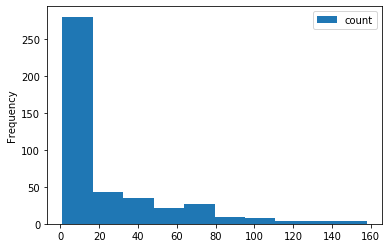

In [39]:
# use pandas built in plotting

fig = barcode_counts_df.plot.hist('count')

### Plotting the data frame
Python has lots of ways to make plots:

 - [matplotlib](https://matplotlib.org/): The base Python plotting library, you can do almost anything with it.
 - [seaborn](https://seaborn.pydata.org/): Useful to easily make certain kinds of complex scientific plots.
 - [Altair](https://altair-viz.github.io/): Developed at University of Washington, great for making **interactive** plots.
 - [plotting directly from pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html): Useful if you have a data frame and need a quick and simple plot.
 
We aren't going to use any of those--instead we are going to use [plotnine](https://plotnine.readthedocs.io/).
This isn't the most commonly used Python plotting library, but it's what I use.
[plotnine](https://plotnine.readthedocs.io/) is essentially a `ggplot2`-mimic for Python.
Note that isn't quite as good as the real `ggplot2` for `R` (for instance, it can't do some of the more complex things that `ggplot2` can do), but it can do all the major basic `ggplot2` things.
The reason I use it is:

 1. I don't think Python has any plotting library as good as `ggplot2` for `R` (unless perhaps you are talking about making interactive plots with [Altair](https://altair-viz.github.io/)), and I prefer the `ggplot2`.
 
 2. I sometimes use `R` as well as Python, and since `plotnine` syntax is almost identical to `ggplot2` syntax, it means that I only have to remember one set of plotting commands and so it is easier to move back and forth. This is the main reason we'll use it in this class too--it will allow us to build on the knowledge you learned about `ggplot2` earlier in the course.
 
First, we import `plotnine`.
In order to get the commands in the same way as in `R`, we have to do the `from plotnine import *` command below to get all of the commands from `plotnine` in the current namespace.
Note that this type of import is generally considered **bad** Python coding (see [here](https://stackoverflow.com/questions/2386714/why-is-import-bad))--one of the nice things about Python compared to `R` is normally there are clear namespaces that tell you what module a function belongs to.
But the `import *` is OK for `plotnine` in Jupyter notebooks (don't do it in more complex code) as it allows the `ggplot2`-like plotting:

In [40]:
from plotnine import *

Now we can plot the data frame very easily using `ggplot2`-like syntax:

/Users/dgranadi/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 19'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


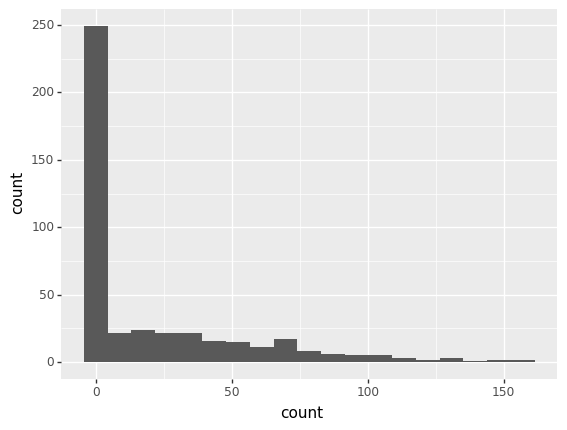

<ggplot: (7017012537)>

In [41]:
p = (ggplot(barcode_counts_df) +
     aes('count') +
     geom_histogram()
     )

p

### Faceting the plot
What if we had barcode counts for several **different** categories (such as genes)?
In an earlier lecture, Rasi told you about the power of `facet_wrap` in `ggplot2`.
We can use that in `plotnine` as well.

Here we do this on made up data, where we simply imaging that our same data multiplied by two is a second category.

First, we now make a merged data frame with the original data and the data multiplied by two.
Note how we do this using the [pandas.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function, and how we use [assign](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html) to name the data in each data frame:

In [42]:
dummy_df = (
    barcode_counts_df.assign(dummy_variable='category_1')
    .append(barcode_counts_df.query('count > 1').assign(dummy_variable='category_2'))
    .reset_index(drop=True)
    )

dummy_df

,barcode,count,dummy_variable
0,ACTAAATAACTTAAGC,63,category_1
1,AACCGTGACCAGGAAG,70,category_1
2,CCACATTCATCGCTGA,30,category_1
3,TTATCGTCTCCCATAT,78,category_1
4,CTACCCGTTTCCCAAC,124,category_1
...,...,...,...
638,GCGGCAGAGCTGCTTT,6,category_2
639,GACTTACGGCGTCATG,2,category_2
640,CATACCTTTCTGACTT,3,category_2
641,AGGGGCACGAGTCGCC,2,category_2


Now plot the data using `facet_wrap`:

/Users/dgranadi/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 15'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


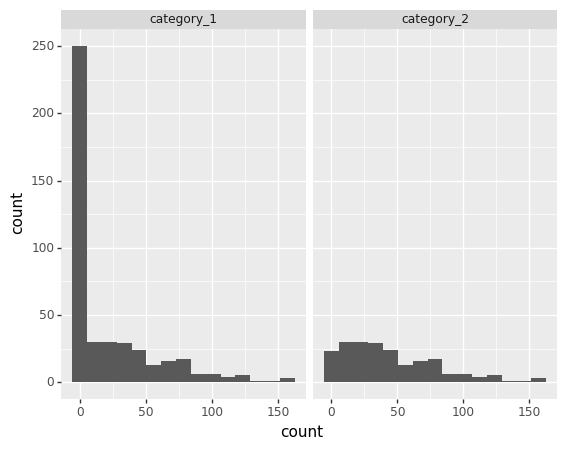

<ggplot: (7017096265)>

In [43]:
p = (ggplot(dummy_df) +
     aes('count') +
     geom_histogram() +
     facet_wrap('~ dummy_variable')
     )

p

## Homework assignment
For the homework, you are going to extend the code above to completely analyze the [real biological analysis of our FASTQ files](#real_analysis).
As described in that section, the FASTQ reads can originate from **either** HA or NA, and that will be distinguished by the most 3' end of the read.
But in our example, we did not distinguish among reads matching to HA and NA, as we didn't even look far enough into the read to tell the identity.

For the homework, your goal is to write code that extends the parsing above to also distinguish between HA and NA, and then eventually get those results into a single data frame from which you can plot a histogram of read counts using `facet_wrap`.
This homework can be completed almost entirely be re-using code above.

You can complete the homework by just writing the analysis at the bottom of this Jupyter notebook (below this cell).
Your analysis should explicitly contain answers to the following:



In [75]:
#starting by copying above function of parsing barcodes into a dictionary

import re
import pandas as pd
from plotnine import *

import Bio.SeqIO


def reverse_complement(seq):
    """Get reverse complement of a DNA sequence.
    
    Parameters
    -----------
    seq : str
        Uppercase DNA sequence.
        
    Returns
    -------
    str
        Reverse complement of the sequence in upper case.
        
    Example
    --------
    >>> reverse_complement('ATGCAC')
    'GTGCAT'
    
    """
    rc_dict = {'A': 'T', 'T': 'A', 'G': 'C', 'C': 'G', 'N': 'N'}
    revcomplement = []
    for nt in reversed(seq.upper()):
        revcomplement.append(rc_dict[nt])
    return ''.join(revcomplement)


def read_barcode(seqread, bclen, upstream='AGGCGGCCGC'):
    """Identify barcode with known upstream sequence.
    
    Parameters
    ----------
    seqread : str
        Nucleotide sequence matching UPSTREAM-BARCODE read in reverse orientation.
    bclen : int
        Length of barcode
    upstream: str
        Sequence upstream of the barcode.
        
    Returns
    -------
    str or None
        Sequence of the barcode in the forward orientation, or `None` if no match to expected barcoded sequence.
        
    Example
    -------
    >>> read_barcode('TTTTTTTTTTTTTTTTGCGGCCGCCT', bclen=16)
    'AAAAAAAAAAAAAAAA'
        
    """
    barcode_matcher = re.compile(f'^(?P<barcode>[ACGT]{{{bclen}}})' + reverse_complement(upstream))
    m = barcode_matcher.search(seqread)
    if not m:
        return None
    else:
        return reverse_complement(seqread[: bclen])
    
    
# now read sequences and apply function
seqreads = list(Bio.SeqIO.parse('barcodes_R1.fastq', 'fastq'))
seqreads_str = [str(seqrecord.seq) for seqrecord in seqreads]

# Get the counts of all barcodes


barcode_counts = {
                  'fluHA': {}, 
                  'fluNA': {}
                 } 
#dictionary for 'flugene' and the values are the number of invalid barcodes for each gene 
invalid = {'fluHA': 0, 'fluNA': 0, 'notHAorNA': 0} 

HAseq = 'CCGGATTTGCATATAATGATGCACCAT'
HAseq_rc = reverse_complement(HAseq)
NAseq = 'CACGATAGATAAATAATAGTGCACCAT'
NAseq_rc = reverse_complement(NAseq)


# first do a loop for if it matches HA and has a barcode
for seq in seqreads_str:
    if re.search(HAseq_rc, seq):
        
        # if it does match, parse barcode 
        barcode = read_barcode(seq, bclen=16)
        if not barcode:
            invalid['fluHA'] += 1
        elif barcode not in barcode_counts['fluHA']:
            barcode_counts['fluHA'][barcode] = 1
        else:
            barcode_counts['fluHA'][barcode] += 1
    
    # then do a loop for if it matches NA and has a barcode       
    elif re.search(NAseq_rc, seq):
        barcode = read_barcode(seq, bclen=16)
        if not barcode:
            invalid['fluNA'] += 1
        elif barcode not in barcode_counts['fluNA']:
            barcode_counts['fluNA'][barcode] = 1
        else:
            barcode_counts['fluNA'][barcode] += 1
    
    # if it matches neither fluHA nor fluNA, add to invalid:
    else:
        invalid['notHAorNA'] += 1
        
        
print(f"Parsed {len(seqreads_str)} sequences, of which {sum(barcode_counts['fluHA'].values())} coorespond to HA and {sum(barcode_counts['fluNA'].values())} correspond to NA.")

Parsed 10000 sequences, of which 5245 coorespond to HA and 3907 correspond to NA.


In [76]:
# covert dictionary to pandas dataframe 

HA_NA = (pd.DataFrame.from_dict(barcode_counts)
      .rename_axis('barcode')
      .reset_index()
      .melt(id_vars=['barcode'], 
            value_vars=['fluHA', 'fluNA'], 
            var_name='flugene', 
            value_name='count')
      .dropna()
     )

HA_NA.head()

,barcode,flugene,count
0,AACCGTGACCAGGAAG,fluHA,70.0
1,TTATCGTCTCCCATAT,fluHA,77.0
2,CATACCAGTCATCCCT,fluHA,28.0
3,ACTTACGTATAAGTCA,fluHA,53.0
4,GCTACTACTATACCAT,fluHA,119.0


/Users/dgranadi/opt/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


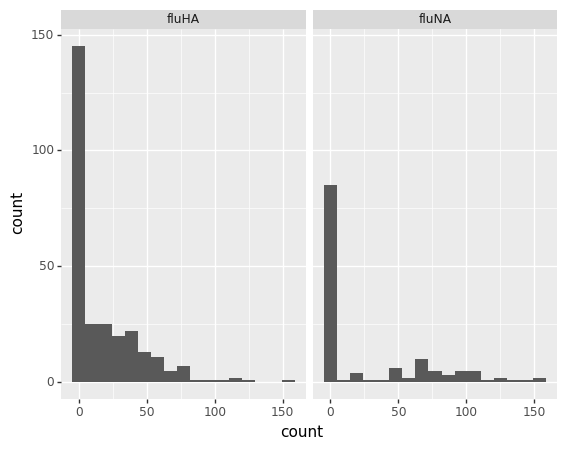

<ggplot: (7017206169)>

In [77]:
graphs = (ggplot(HA_NA) +
     aes('count') +
     geom_histogram() +
     facet_wrap('~ flugene')
     )

graphs

In [ ]:
#Scratch work cell

'''#starting by copying above function of parsing barcodes into a dictionary

import re
import pandas as pd
from plotnine import *

import Bio.SeqIO


def reverse_complement(seq):
    """Get reverse complement of a DNA sequence.
    
    Parameters
    -----------
    seq : str
        Uppercase DNA sequence.
        
    Returns
    -------
    str
        Reverse complement of the sequence in upper case.
        
    Example
    --------
    >>> reverse_complement('ATGCAC')
    'GTGCAT'
    
    """
    rc_dict = {'A': 'T', 'T': 'A', 'G': 'C', 'C': 'G', 'N': 'N'}
    revcomplement = []
    for nt in reversed(seq.upper()):
        revcomplement.append(rc_dict[nt])
    return ''.join(revcomplement)


def read_barcode(seqread, bclen, upstream='AGGCGGCCGC'):
    """Identify barcode with known upstream sequence.
    
    Parameters
    ----------
    seqread : str
        Nucleotide sequence matching UPSTREAM-BARCODE read in reverse orientation.
    bclen : int
        Length of barcode
    upstream: str
        Sequence upstream of the barcode.
        
    Returns
    -------
    str or None
        Sequence of the barcode in the forward orientation, or `None` if no match to expected barcoded sequence.
        
    Example
    -------
    >>> read_barcode('TTTTTTTTTTTTTTTTGCGGCCGCCT', bclen=16)
    'AAAAAAAAAAAAAAAA'
        
    """
    barcode_matcher = re.compile(f'^(?P<barcode>[ACGT]{{{bclen}}})' + reverse_complement(upstream))
    m = barcode_matcher.search(seqread)
    if not m:
        return None
    else:
        return reverse_complement(seqread[: bclen])
    
    
# now read sequences and apply function
seqreads = list(Bio.SeqIO.parse('barcodes_R1.fastq', 'fastq'))
seqreads_str = [str(seqrecord.seq) for seqrecord in seqreads]

# Get the counts of all barcodes


barcode_counts = {
                  'fluHA': {}, 
                  'fluNA': {}
                 } 
#dictionary for 'flugene' and the values are the number of invalid barcodes for each gene 
invalid = {'fluHA': 0, 'fluNA': 0, 'notHAorNA': 0} 

HAseq = 'CCGGATTTGCATATAATGATGCACCAT'
HAseq_rc = reverse_complement(HAseq)
NAseq = 'CACGATAGATAAATAATAGTGCACCAT'
NAseq_rc = reverse_complement(NAseq)


# first do a loop for if it matches HA and has a barcode
for seq in seqreads_str:
    if re.search(HAseq_rc, seq):
        
        # if it does match, parse barcode 
        barcode = read_barcode(seq, bclen=16)
        if not barcode:
            invalid['fluHA'] += 1
        elif barcode not in barcode_counts['fluHA']:
            barcode_counts['fluHA'][barcode] = 1
        else:
            barcode_counts['fluHA'][barcode] += 1
    
    # then do a loop for if it matches NA and has a barcode       
    elif re.search(NAseq_rc, seq):
        barcode = read_barcode(seq, bclen=16)
        if not barcode:
            invalid['fluNA'] += 1
        elif barcode not in barcode_counts['fluNA']:
            barcode_counts['fluNA'][barcode] = 1
        else:
            barcode_counts['fluNA'][barcode] += 1
    
    # if it matches neither fluHA nor fluNA, add to invalid:
    else:
        invalid['notHAorNA'] += 1
        
        
print(f"Parsed {len(seqreads_str)} sequences, of which {sum(barcode_counts['fluHA'].values())} coorespond to HA and {sum(barcode_counts['fluNA'].values())} correspond to NA.")'''